In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%tensorflow_version 1.x
!pip install tensorflow-gpu==1.14.0

TensorFlow 1.x selected.
     |████████████████████████████████| 377.0MB 42kB/s 
     |████████████████████████████████| 3.2MB 29.9MB/s 
     |████████████████████████████████| 491kB 42.4MB/s 
ERROR: tensorflow 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 1.15.2 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.14.0 which is incompatible.
ERROR: tensorflow 1.15.2 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.14.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [3]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.2MB/s 


In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [5]:
print(tf.__version__)

1.15.2


In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
!ls /content/drive/My\ Drive/logically_test

app.py	 model.py		  preprocess.py  Report.docx
main.py  NLP_data_scientist_test  __pycache__	 sentiment_analysis.ipynb


In [0]:
df = pd.read_excel('/content/drive/My Drive/logically_test/NLP_data_scientist_test/data/Entity_sentiment_trainV2.xlsx')

## **EDA**

In [9]:
df.head()

,Sentence,Entity,Sentiment
0,The website was very easy to use and my insura...,website,positive
1,The web sight was easy to understand and I got...,web sight,positive
2,Having filled in the application on-line I cou...,point,negative
3,After finding AXA was cheaper than my renewal ...,prices,positive
4,The quote was a reasonable price compared with...,insurances,positive


In [10]:
len(df)

5999

In [11]:
df.isnull().sum()

Sentence     0
Entity       0
Sentiment    0
dtype: int64

In [0]:
# Description of the dataset

In [13]:
df.describe()

,Sentence,Entity,Sentiment
count,5999,5999,5999
unique,5649,748,2
top,Found website very easy to use and quick with ...,service,positive
freq,2,705,4100


In [14]:
df1 = df.groupby('Sentiment').count()['Sentence'].reset_index().sort_values(by='Sentence',ascending=False)
df1.style.background_gradient(cmap='Purples')

,Sentiment,Sentence
1,positive,4100
0,negative,1899


In [0]:
# Visualising the labels

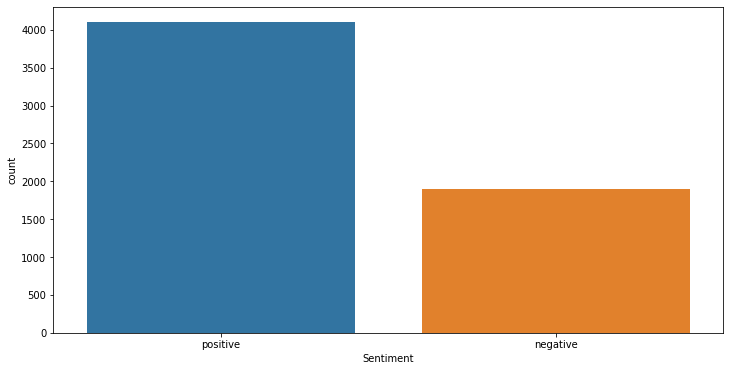

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

## **PREPROCESSING**

In [0]:
# creating input examples

In [0]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['Sentiment'])
df['entity_label'] = encoder.fit_transform(df['Entity'])
mask = np.random.rand(len(df)) < 0.7 #spliting 70% of data for training and 30% for testing 

train = df[mask]
test = df[~mask]

DATA_COLUMN = 'Sentence'
ENTITY_COLUMN = 'Entity'
LABEL_COLUMN = 'label'
# list of labels pos/ neg
label_list = [0,1]

# BERT's run_classifier code to create examples from the data
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = x[ENTITY_COLUMN], 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

test_InputExamples = test.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = x[ENTITY_COLUMN], 
                                                                   label = x[LABEL_COLUMN]), axis = 1)


## **Loading BERT**

In [0]:
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)


**Tokenizing**

In [20]:
tokenizer = create_tokenizer_from_hub_module()

# Sequences set to be at most 32 tokens long.
MAX_SEQ_LENGTH = 32

# train and test features converted to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)
test_features = bert.run_classifier.convert_examples_to_features(test_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Writing example 0 of 4228


INFO:tensorflow:Writing example 0 of 4228


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the web sight was easy to understand and i got the cover i wanted and need [SEP] web sight [SEP]


INFO:tensorflow:tokens: [CLS] the web sight was easy to understand and i got the cover i wanted and need [SEP] web sight [SEP]


INFO:tensorflow:input_ids: 101 1996 4773 4356 2001 3733 2000 3305 1998 1045 2288 1996 3104 1045 2359 1998 2342 102 4773 4356 102 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 4773 4356 2001 3733 2000 3305 1998 1045 2288 1996 3104 1045 2359 1998 2342 102 4773 4356 102 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] having filled in the application on - line i could not see the point of answering all the questions again on the phone . [SEP] point [SEP]


INFO:tensorflow:tokens: [CLS] having filled in the application on - line i could not see the point of answering all the questions again on the phone . [SEP] point [SEP]


INFO:tensorflow:input_ids: 101 2383 3561 1999 1996 4646 2006 1011 2240 1045 2071 2025 2156 1996 2391 1997 10739 2035 1996 3980 2153 2006 1996 3042 1012 102 2391 102 0 0 0 0


INFO:tensorflow:input_ids: 101 2383 3561 1999 1996 4646 2006 1011 2240 1045 2071 2025 2156 1996 2391 1997 10739 2035 1996 3980 2153 2006 1996 3042 1012 102 2391 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] excellent price for insurance and good fast service from professional staff [SEP] price [SEP]


INFO:tensorflow:tokens: [CLS] excellent price for insurance and good fast service from professional staff [SEP] price [SEP]


INFO:tensorflow:input_ids: 101 6581 3976 2005 5427 1998 2204 3435 2326 2013 2658 3095 102 3976 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6581 3976 2005 5427 1998 2204 3435 2326 2013 2658 3095 102 3976 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] exhaust ##ive as expected but as i had a company car ( claim free ) for eight years i feel i should have been able to use [SEP] claims bonus [SEP]


INFO:tensorflow:tokens: [CLS] exhaust ##ive as expected but as i had a company car ( claim free ) for eight years i feel i should have been able to use [SEP] claims bonus [SEP]


INFO:tensorflow:input_ids: 101 15095 3512 2004 3517 2021 2004 1045 2018 1037 2194 2482 1006 4366 2489 1007 2005 2809 2086 1045 2514 1045 2323 2031 2042 2583 2000 2224 102 4447 6781 102


INFO:tensorflow:input_ids: 101 15095 3512 2004 3517 2021 2004 1045 2018 1037 2194 2482 1006 4366 2489 1007 2005 2809 2086 1045 2514 1045 2323 2031 2042 2583 2000 2224 102 4447 6781 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] web site very user friendly the cost of the insurance was extremely competitive with many optional add on ##s [SEP] site [SEP]


INFO:tensorflow:tokens: [CLS] web site very user friendly the cost of the insurance was extremely competitive with many optional add on ##s [SEP] site [SEP]


INFO:tensorflow:input_ids: 101 4773 2609 2200 5310 5379 1996 3465 1997 1996 5427 2001 5186 6975 2007 2116 11887 5587 2006 2015 102 2609 102 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4773 2609 2200 5310 5379 1996 3465 1997 1996 5427 2001 5186 6975 2007 2116 11887 5587 2006 2015 102 2609 102 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:Writing example 0 of 1771


INFO:tensorflow:Writing example 0 of 1771


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the website was very easy to use and my insurance was up and running within a few minutes . . . quick simple brilliant [SEP] website [SEP]


INFO:tensorflow:tokens: [CLS] the website was very easy to use and my insurance was up and running within a few minutes . . . quick simple brilliant [SEP] website [SEP]


INFO:tensorflow:input_ids: 101 1996 4037 2001 2200 3733 2000 2224 1998 2026 5427 2001 2039 1998 2770 2306 1037 2261 2781 1012 1012 1012 4248 3722 8235 102 4037 102 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 4037 2001 2200 3733 2000 2224 1998 2026 5427 2001 2039 1998 2770 2306 1037 2261 2781 1012 1012 1012 4248 3722 8235 102 4037 102 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] after finding ax ##a was cheaper than my renewal i instantly went to their website to see the offers and prices they were offering . [SEP] prices [SEP]


INFO:tensorflow:tokens: [CLS] after finding ax ##a was cheaper than my renewal i instantly went to their website to see the offers and prices they were offering . [SEP] prices [SEP]


INFO:tensorflow:input_ids: 101 2044 4531 22260 2050 2001 16269 2084 2026 14524 1045 6880 2253 2000 2037 4037 2000 2156 1996 4107 1998 7597 2027 2020 5378 1012 102 7597 102 0 0 0


INFO:tensorflow:input_ids: 101 2044 4531 22260 2050 2001 16269 2084 2026 14524 1045 6880 2253 2000 2037 4037 2000 2156 1996 4107 1998 7597 2027 2020 5378 1012 102 7597 102 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] the quote was a reasonable price compared with other insurance ##s . [SEP] insurance ##s [SEP]


INFO:tensorflow:tokens: [CLS] the quote was a reasonable price compared with other insurance ##s . [SEP] insurance ##s [SEP]


INFO:tensorflow:input_ids: 101 1996 14686 2001 1037 9608 3976 4102 2007 2060 5427 2015 1012 102 5427 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 14686 2001 1037 9608 3976 4102 2007 2060 5427 2015 1012 102 5427 2015 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] easy to use fair price don ' t like auto renewal though . [SEP] renewal [SEP]


INFO:tensorflow:tokens: [CLS] easy to use fair price don ' t like auto renewal though . [SEP] renewal [SEP]


INFO:tensorflow:input_ids: 101 3733 2000 2224 4189 3976 2123 1005 1056 2066 8285 14524 2295 1012 102 14524 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3733 2000 2224 4189 3976 2123 1005 1056 2066 8285 14524 2295 1012 102 14524 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] very expensive for an experienced driver better be good for the price had an accident ( hit in rear by 3rd party ) seemed to put the insurance [SEP] experience [SEP]


INFO:tensorflow:tokens: [CLS] very expensive for an experienced driver better be good for the price had an accident ( hit in rear by 3rd party ) seemed to put the insurance [SEP] experience [SEP]


INFO:tensorflow:input_ids: 101 2200 6450 2005 2019 5281 4062 2488 2022 2204 2005 1996 3976 2018 2019 4926 1006 2718 1999 4373 2011 3822 2283 1007 2790 2000 2404 1996 5427 102 3325 102


INFO:tensorflow:input_ids: 101 2200 6450 2005 2019 5281 4062 2488 2022 2204 2005 1996 3976 2018 2019 4926 1006 2718 1999 4373 2011 3822 2283 1007 2790 2000 2404 1996 5427 102 3325 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


**create_model**

In [0]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  """Creates a classification model."""

  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)


  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout to prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # one-hot encoding labels
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # for predicting, predicted labels and the probabiltiies are needed.
    if is_predicting:
      return (predicted_labels, log_probs)

    # for train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)




In [0]:
# Model function

In [0]:
# model_fn_builder creates our true model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        f1_score = tf.contrib.metrics.f1_score(
            label_ids,
            predicted_labels)
        auc = tf.metrics.auc(
            label_ids,
            predicted_labels)
        recall = tf.metrics.recall(
            label_ids,
            predicted_labels)
        precision = tf.metrics.precision(
            label_ids,
            predicted_labels) 
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        return {
            "eval_accuracy": accuracy,
            "f1_score": f1_score,
            "auc": auc,
            "precision": precision,
            "recall": recall,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
        }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

**OUTPUT_DIR**

In [0]:
# Assigning Output Directory

In [24]:
OUTPUT_DIR = '/content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR'#@param {type:"string"}
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    # Doesn't matter if the directory didn't exist
    pass
tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR *****


**CONFIG**

In [25]:
# Compute train and warmup steps from batch size
MAX_SEQ_LENGTH = 32
BATCH_SIZE = 50
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 6
# Warmup is a period of time where hte learning rate 
# is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 500
SAVE_SUMMARY_STEPS = 252

# Compute # train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify outpit directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir= OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE},
  model_dir = OUTPUT_DIR)



INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR', '_tf_random_seed': None, '_save_summary_steps': 252, '_save_checkpoints_steps': 500, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9b49f9e828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR', '_tf_random_seed': None, '_save_summary_steps': 252, '_save_checkpoints_steps': 500, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9b49f9e828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
num_train_steps

505

In [0]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# **TRAINING**

In [0]:
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt.


INFO:tensorflow:loss = 0.6960508, step = 0


INFO:tensorflow:loss = 0.6960508, step = 0


INFO:tensorflow:global_step/sec: 2.93507


INFO:tensorflow:global_step/sec: 2.93507


INFO:tensorflow:loss = 0.14145197, step = 100 (34.072 sec)


INFO:tensorflow:loss = 0.14145197, step = 100 (34.072 sec)


INFO:tensorflow:global_step/sec: 4.49936


INFO:tensorflow:global_step/sec: 4.49936


INFO:tensorflow:loss = 0.10692974, step = 200 (22.225 sec)


INFO:tensorflow:loss = 0.10692974, step = 200 (22.225 sec)


INFO:tensorflow:global_step/sec: 3.17431


INFO:tensorflow:global_step/sec: 3.17431


INFO:tensorflow:loss = 0.004370566, step = 300 (31.503 sec)


INFO:tensorflow:loss = 0.004370566, step = 300 (31.503 sec)


INFO:tensorflow:global_step/sec: 4.56593


INFO:tensorflow:global_step/sec: 4.56593


INFO:tensorflow:loss = 0.0032677948, step = 400 (21.903 sec)


INFO:tensorflow:loss = 0.0032677948, step = 400 (21.903 sec)


INFO:tensorflow:Saving checkpoints for 500 into /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt.


INFO:tensorflow:Saving checkpoints for 500 into /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt.


INFO:tensorflow:global_step/sec: 3.5346


INFO:tensorflow:global_step/sec: 3.5346


INFO:tensorflow:loss = 0.005271162, step = 500 (28.290 sec)


INFO:tensorflow:loss = 0.005271162, step = 500 (28.290 sec)


INFO:tensorflow:Saving checkpoints for 505 into /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt.


INFO:tensorflow:Saving checkpoints for 505 into /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt.


INFO:tensorflow:Loss for final step: 0.004997228.


INFO:tensorflow:Loss for final step: 0.004997228.


Training took time  0:03:44.072552


# **MODEL EVALUATION**

In [0]:
test_input_fn = run_classifier.input_fn_builder(
    features=test_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)



In [0]:
performance_stats = estimator.evaluate(input_fn=test_input_fn, steps=None)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-04-11T13:58:44Z


INFO:tensorflow:Starting evaluation at 2020-04-11T13:58:44Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-505


INFO:tensorflow:Restoring parameters from /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-505


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-04-11-13:58:55


INFO:tensorflow:Finished evaluation at 2020-04-11-13:58:55


INFO:tensorflow:Saving dict for global step 505: auc = 0.92359143, eval_accuracy = 0.9305711, f1_score = 0.9482902, false_negatives = 68.0, false_positives = 56.0, global_step = 505, loss = 0.29325274, precision = 0.9530595, recall = 0.94356847, true_negatives = 525.0, true_positives = 1137.0


INFO:tensorflow:Saving dict for global step 505: auc = 0.92359143, eval_accuracy = 0.9305711, f1_score = 0.9482902, false_negatives = 68.0, false_positives = 56.0, global_step = 505, loss = 0.29325274, precision = 0.9530595, recall = 0.94356847, true_negatives = 525.0, true_positives = 1137.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 505: /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-505


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 505: /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-505


**PERFORMANCE SATS**

In [0]:
performance_stats

{'auc': 0.92359143,
 'eval_accuracy': 0.9305711,
 'f1_score': 0.9482902,
 'false_negatives': 68.0,
 'false_positives': 56.0,
 'global_step': 505,
 'loss': 0.29325274,
 'precision': 0.9530595,
 'recall': 0.94356847,
 'true_negatives': 525.0,
 'true_positives': 1137.0}

In [0]:
# load model from checkpoint

In [0]:
latest = tf.train.latest_checkpoint('/content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR')
latest

'/content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-505'

latest saved checkpoint for the model

In [0]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('/content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-0.meta') #computational graph
model = saver.restore(sess,latest)


In [0]:
run_config

**Predict Function**

In [0]:
def getPrediction(in_sentences,entities):
  labels = ["Negative", "Positive"]
  input_examples = [run_classifier.InputExample(guid="", text_a = sent, text_b = ent, label = 0) for sent,ent in zip(in_sentences,entities)] # here, "" is just a dummy label
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [({"Sentence":sentence,"Entity":entity, "pred_prob":prediction['probabilities'], "sentiment":labels[prediction['labels']]}) for sentence, entity, prediction in zip(in_sentences,entities, predictions)]

In [0]:
sent = ["the website was great", "the movie was good but I didn't like it"]
ent = ["website","movie"]
predictions = getPrediction(sent,ent)

INFO:tensorflow:Writing example 0 of 2


INFO:tensorflow:Writing example 0 of 2


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] the website was great [SEP] website [SEP]


INFO:tensorflow:tokens: [CLS] the website was great [SEP] website [SEP]


INFO:tensorflow:input_ids: 101 1996 4037 2001 2307 102 4037 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 4037 2001 2307 102 4037 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] the movie was good but i didn ' t like it [SEP] movie [SEP]


INFO:tensorflow:tokens: [CLS] the movie was good but i didn ' t like it [SEP] movie [SEP]


INFO:tensorflow:input_ids: 101 1996 3185 2001 2204 2021 1045 2134 1005 1056 2066 2009 102 3185 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1996 3185 2001 2204 2021 1045 2134 1005 1056 2066 2009 102 3185 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


ERROR:tensorflow:Couldn't match files for checkpoint /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-759


ERROR:tensorflow:Couldn't match files for checkpoint /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-759


INFO:tensorflow:Could not find trained model in model_dir: /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR, running initialization to predict.


INFO:tensorflow:Could not find trained model in model_dir: /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR, running initialization to predict.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [0]:
predictions

[{'Entity': 'website',
  'Sentence': 'the website was great',
  'pred_prob': array([-0.6650544, -0.722052 ], dtype=float32),
  'sentiment': 'Negative'},
 {'Entity': 'movie',
  'Sentence': "the movie was good but I didn't like it",
  'pred_prob': array([-0.6282205 , -0.76258385], dtype=float32),
  'sentiment': 'Negative'}]



```
# This is formatted as code
```

# **PREDITIONS ON THE TEST SET**

> Indented block



In [0]:
test_set = pd.read_excel('/content/drive/My Drive/logically_test/NLP_data_scientist_test/data/Entity_sentiment_testV2.xlsx')

In [0]:
test_set.head()

,Sentence,Entity
0,I telephoned AXA customer service as we had a ...,staff
1,Got the quote on line which was very straightf...,axa
2,Not enough information on insurance details no...,information
3,It was admittedly at 11pm but they DO claim to...,service
4,Good servicewith very little hassleeasy to use...,price


In [0]:
Sent = list(test_set['Sentence'])
Entity = list(test_set['Entity'])
pred = getPrediction(Sent,Entity)

INFO:tensorflow:Writing example 0 of 1290


INFO:tensorflow:Writing example 0 of 1290


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] i telephone ##d ax ##a customer service as we had a query and the member of staff was very helpful in as much that her polite ##ness made [SEP] staff [SEP]


INFO:tensorflow:tokens: [CLS] i telephone ##d ax ##a customer service as we had a query and the member of staff was very helpful in as much that her polite ##ness made [SEP] staff [SEP]


INFO:tensorflow:input_ids: 101 1045 7026 2094 22260 2050 8013 2326 2004 2057 2018 1037 23032 1998 1996 2266 1997 3095 2001 2200 14044 1999 2004 2172 2008 2014 13205 2791 2081 102 3095 102


INFO:tensorflow:input_ids: 101 1045 7026 2094 22260 2050 8013 2326 2004 2057 2018 1037 23032 1998 1996 2266 1997 3095 2001 2200 14044 1999 2004 2172 2008 2014 13205 2791 2081 102 3095 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] got the quote on line which was very straightforward then rang ax ##a . [SEP] ax ##a [SEP]


INFO:tensorflow:tokens: [CLS] got the quote on line which was very straightforward then rang ax ##a . [SEP] ax ##a [SEP]


INFO:tensorflow:input_ids: 101 2288 1996 14686 2006 2240 2029 2001 2200 19647 2059 8369 22260 2050 1012 102 22260 2050 102 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2288 1996 14686 2006 2240 2029 2001 2200 19647 2059 8369 22260 2050 1012 102 22260 2050 102 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] not enough information on insurance details no idea what cover i have including 90 days european cover but is that including fully comprehensive [SEP] information [SEP]


INFO:tensorflow:tokens: [CLS] not enough information on insurance details no idea what cover i have including 90 days european cover but is that including fully comprehensive [SEP] information [SEP]


INFO:tensorflow:input_ids: 101 2025 2438 2592 2006 5427 4751 2053 2801 2054 3104 1045 2031 2164 3938 2420 2647 3104 2021 2003 2008 2164 3929 7721 102 2592 102 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2025 2438 2592 2006 5427 4751 2053 2801 2054 3104 1045 2031 2164 3938 2420 2647 3104 2021 2003 2008 2164 3929 7721 102 2592 102 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] it was admitted ##ly at 11 ##pm but they do claim to offer a 24 - hour service and there was no message forthcoming to say that the [SEP] service [SEP]


INFO:tensorflow:tokens: [CLS] it was admitted ##ly at 11 ##pm but they do claim to offer a 24 - hour service and there was no message forthcoming to say that the [SEP] service [SEP]


INFO:tensorflow:input_ids: 101 2009 2001 4914 2135 2012 2340 9737 2021 2027 2079 4366 2000 3749 1037 2484 1011 3178 2326 1998 2045 2001 2053 4471 16875 2000 2360 2008 1996 102 2326 102


INFO:tensorflow:input_ids: 101 2009 2001 4914 2135 2012 2340 9737 2021 2027 2079 4366 2000 3749 1037 2484 1011 3178 2326 1998 2045 2001 2053 4471 16875 2000 2360 2008 1996 102 2326 102


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] good service ##with very little has ##sle ##ea ##sy to use and very good price wise . [SEP] price [SEP]


INFO:tensorflow:tokens: [CLS] good service ##with very little has ##sle ##ea ##sy to use and very good price wise . [SEP] price [SEP]


INFO:tensorflow:input_ids: 101 2204 2326 24415 2200 2210 2038 25016 5243 6508 2000 2224 1998 2200 2204 3976 7968 1012 102 3976 102 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2204 2326 24415 2200 2210 2038 25016 5243 6508 2000 2224 1998 2200 2204 3976 7968 1012 102 3976 102 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


ERROR:tensorflow:Couldn't match files for checkpoint /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-759


ERROR:tensorflow:Couldn't match files for checkpoint /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR/model.ckpt-759


INFO:tensorflow:Could not find trained model in model_dir: /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR, running initialization to predict.


INFO:tensorflow:Could not find trained model in model_dir: /content/drive/My Drive/logically_test/NLP_data_scientist_test/OUTPUT_DIR, running initialization to predict.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [0]:
pred

[{'Entity': 'staff',
  'Sentence': 'I telephoned AXA customer service as we had a query and the member of staff was very helpful in as much that her politeness made us choose to use AXA for our holiday insurance.',
  'pred_prob': array([-7.8432059e+00, -3.9247915e-04], dtype=float32),
  'sentiment': 'Positive'},
 {'Entity': 'axa',
  'Sentence': 'Got the quote on line which was very straightforward then rang axa.',
  'pred_prob': array([-6.7820563e+00, -1.1345862e-03], dtype=float32),
  'sentiment': 'Positive'},
 {'Entity': 'information',
  'Sentence': 'Not enough information on insurance details no idea what cover I have including 90 days European cover but is that including fully comprehensive',
  'pred_prob': array([-4.265807  , -0.01414006], dtype=float32),
  'sentiment': 'Positive'},
 {'Entity': 'service',
  'Sentence': 'It was admittedly at 11pm but they DO claim to offer a 24-hour service and there was no message forthcoming to say that the site was down for maintenance.',
  'pre